Singular Value Decomposition and Image Processing

The Singular Value Decomposition (SVD) has many applications in pure mathematics, applied mathematics, and data science. A common theme of many applications of SVD is that for a matrix $A$, by using SVD, we can find a new matrix $A_k$ which is a good approximation of $A$, but the rank of $A_k$ is at most $k$. In general, a small rank matrix can be described with a lower number of entries; we can regard $A_k$ as a "compression" of $A$. 

The goal of this project is twofold. First of all, we investigate how to compress image data using the already implemented SVD calculation method. Secondly, we will make a code for one step of SVD calculation. 

#### 1. Two key steps on the diagonalization of a symmetric matrix (and hence on SVD) are Householder reduction and the QR method. Construct a method QRalgorithm(A, err) where $A$ is a symmetric tridiagonal matrix, err is a positive real number, and output is a list of eigenvalues of $A$. Let $A^{(k)}$ be the output of $k$-th iteration (See the notation in the lecture note) and let $e^{(k)}$ be the vector consisting of diagonal entries of $A^{(k)}$. Stop the iteration if either 
<ul>
    <li>$k = 1000$ or;</li>
    <li>$||e^{(k)} - e^{(k-1)}||_{\infty} < \mathrm{err}$.</li>
</ul>

#### Let $M$ be a $(10 \times 10)$ symmetric tridiagonal matrix such that $$M_{ij} = \begin{cases}11-i, & \mbox{if } i = j,\\1, & \mbox{if } i = j+1 \mbox{ or } i = j-1,\\0, & \mbox{otherwise}.\end{cases}$$
#### By using QRalgorithm(A, err), compute eigenvalues of $M$. Set $\mathrm{err} = 10^{-5}$. 

In [1]:
import numpy as np

def MultiplyMatrix(A, B):
    if (len(A[0]) == len(B)):
        product = np.zeros((len(A), len(B[0])))
        for i in range(0, len(A)):
            for j in range(0, len(B[0])):
                for k in range(0, len(B)):
                    product[i][j] = product[i][j] + A[i][k] * B[k][j]
    return product

def Transpose(A):
    T = np.zeros((len(A),len(A[0])))
    for i in range(0,len(A[0])):
        for j in range(0,len(A)):
            T[i][j] = A[j][i]
    return T

def InfinityNorm(a):
    max = np.absolute(a[0])
    for i in range(0, int(len(a))):
        if np.absolute(a[i]) > max:
            max = np.absolute(a[i])
    return max


#precondition - A is tridiagonal
def QRalgorithm(A, err):
    n = len(A)
    P = np.zeros((n-1,n,n))
    tempA = A
    count = 0
    while(count<=1000):
        for k in range(1,n):
        #compute all P matrices
            #cn and sn set rotation values for the kth A matrix
            cn = tempA[k-1][k-1]/np.sqrt((tempA[k-1][k-1]**2) +(tempA[k][k-1]**2))
            sn = (-1*tempA[k][k-1])/np.sqrt((tempA[k-1][k-1]**2) +(tempA[k][k-1]**2))
            
            #ROT is the kth rotation matrix
            ROT = np.zeros((n,n))
            for i in range(0,n):
                for j in range(0,n):
                    if i == j:
                        if i==k or i == k-1:
                            ROT[i][i] = cn
                        else:
                            ROT[i][i] = 1
                    else:
                        if i==k or i == k-1:
                            if i == k-1:
                                if i == j-1:
                                    ROT[i][j] = -1*sn
                                else:
                                    ROT[i][j] = 0
                            else:
                                if i == j+1:
                                    ROT[i][j] = sn
                                else:
                                    ROT[i][j] = 0
                        else:
                            ROT[i][j] = 0
            #store ROT in the list of P matrices
            P[k-1] = ROT
            #compute the (k+1)th A matrix
            product = MultiplyMatrix(P[k-1],tempA)#np.matmul(P[k-1],tempA)
            tempA = product
            

        #find the orthogonal and upper triangular matrices
        prod = MultiplyMatrix(P[len(P)-1],P[len(P)-2])
        for m in reversed(range(0,len(P)-2)):
            prod = MultiplyMatrix(prod, P[m])
            
        Q = Transpose(prod)
        R = tempA

        #store tempA in prev to use when calculating error
        prev = tempA
        tempA = MultiplyMatrix(R,Q)
        
        #stop and return if the relative error is smaller than the err parameter
        oldeigs = np.zeros(n)
        neweigs = np.zeros(n)
        for i in range(0,n):
            oldeigs[i] = prev[i][i]
            neweigs[i] = tempA[i][i]
        norm = InfinityNorm(neweigs-oldeigs)
        if(norm<err):
            print(neweigs)
            return tempA
        count = count + 1
    return tempA
            
                        
def main():
    n = 10
    err = 0.00001
    M = np.zeros((n,n))
    for i in range(0,n):
        for j in range(0,n):
            if i == j:
                M[i][j] = 11 - (i+1)
            elif i == j+1 or i == j-1:
                M[i][j] = 1
            else:
                M[i][j] = 0
    print("Find eigenvalues for the following matrix - ")
    print(M)
    
    print("\nQRalgorithm(A,err) gives the following eigenvalues - ")
    qreig = QRalgorithm(M,err)
    
    #QR method for finding eigenvalues using numpy library
    matrix = M
    count = 0
    while(count <= 1000):
        q,r = np.linalg.qr(matrix)
        oldeigs = np.zeros(n)
        neweigs = np.zeros(n)
        for i in range(0,n):
            oldeigs[i] = matrix[i][i]
        matrix = MultiplyMatrix(r,q)
        for i in range(0,n):
            neweigs[i] = matrix[i][i]
        norm = InfinityNorm(neweigs-oldeigs)
        if(norm<err):
            count = 1000
        count = count + 1
    
    print("\nBuilt-in QR gives the following eigenvalues - ")
    eig = np.zeros(n)
    for i in range(0,n):
        eig[i] = matrix[i][i]
    print(eig)
main()

Find eigenvalues for the following matrix - 
[[10.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  9.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  8.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  7.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  6.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  5.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  4.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  3.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  1.]]

QRalgorithm(A,err) gives the following eigenvalues - 
[10.74618812  9.21064889  8.03894694  7.00397387  6.00022449  4.99978339
  3.99604824  2.96105888  1.78932135  0.25380582]

Built-in QR gives the following eigenvalues - 
[10.74618812  9.21064889  8.03894694  7.00397387  6.00022449  4.99978339
  3.99604824  2.96105888  1.78932135  0.25380582]


From now on, we will discuss image processing with Python. For simplicity, we are going to use a grayscale (black and white) image only. Below is how to convert a grayscale image to a python matrix. Matplotlib can only read the .png file natively. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

sloth_img = plt.imread('sloth_gray.png') 
sloth_img_array = sloth_img[:,:,0] 
# These two lines read 'sloth_gray.png' and record it as an array.

A matrix can be converted to a grayscale image, like the following.

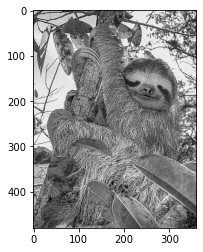

In [3]:
new_img = np.ndarray((480,360,3),dtype=float)
for i in range(3):
    new_img[:,:,i] = sloth_img_array
# This part makes a multi-dimensional array, which can be understood as an image.
    
plt.imshow(new_img)
plt.show()

In the above code, <b>sloth_img_array</b> is a matrix. Thus we can compute its SVD and use it to do some image processing. 

For a matrix $A$, <b>svd</b> method in the linear algebra module can be used to calculate its SVD. The output is a triplet of data $U$, $D$, and $V^t$, where $U$ and $V^t$ are orthogonal matrices and $D$ is a list of singular values of $A$ (not a diagonal matrix!). So if we denote $S$ as the diagonal matrix whose diagonal entries are numbers on $D$, then $A = USV^t$. 

In [4]:
A = np.array([[1,0,1],[0,1,0],[0,1,1],[0,1,0],[1,1,0]])
U, D, Vt = la.svd(A, full_matrices = True)
print("U=", U)
print("D=", D)
print("V^t=", Vt)

U= [[-3.65148372e-01  8.16496581e-01  5.67748493e-16  1.18391207e-01
  -4.31258069e-01]
 [-3.65148372e-01 -4.08248290e-01 -3.91737304e-16 -5.63487672e-01
  -6.18451004e-01]
 [-5.47722558e-01 -2.49196703e-16  7.07106781e-01 -1.18391207e-01
   4.31258069e-01]
 [-3.65148372e-01 -4.08248290e-01 -3.61832812e-16  8.00270086e-01
  -2.44065135e-01]
 [-5.47722558e-01  5.90601783e-16 -7.07106781e-01 -1.18391207e-01
   4.31258069e-01]]
D= [2.23606798 1.41421356 1.        ]
V^t= [[-4.08248290e-01 -8.16496581e-01 -4.08248290e-01]
 [ 5.77350269e-01 -5.77350269e-01  5.77350269e-01]
 [-7.07106781e-01 -3.59383107e-16  7.07106781e-01]]


#### 2. Construct a method SVDcompression(A, k) which performs
<ul>
    <li>Compute a SVD of $A$;</li>
    <li>Calculate $A_k = U_k \cdot S_k \cdot V_k^t$, where $U_k$ is the first $k$ columns of $U$, $S_k$ is the first $k$ rows and $k$ columns of $S$, and $V_k^t$ is the first $k$ rows of $V^t$;</li>
    <li>Convert $A_k$ as a grayscale image and show it.</li>
</ul>

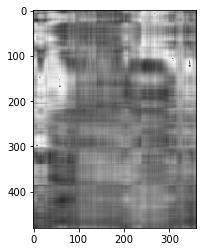

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

def SVDcompression(A,k):
    #use numpy svd to find U,D, and Vt
    U, D, Vt = la.svd(A, full_matrices = True)
    
    #get m and n
    m = len(U)
    n = len(Vt)
    
    #build S matrix from D
    S = np.zeros((m,n))
    for r in range(0,m):
        for c in range(0,n):
            if (r==c):
                S[r][c] = D[r]
            else:
                S[r][c] = 0
                
    #build compressed matrices out U, S, and Vt
    Uk = np.zeros((m,k))
    Sk = np.zeros((k,k))
    Vkt = np.zeros((k,n))
    for r in range(0,m):
        for c in range(0,k):
            Uk[r][c] = U[r][c]
            
    for r in range(0,k):
        for c in range(0,k):
            Sk[r][c] = S[r][c]
            
    for r in range(0,k):
        for c in range(0,n):
            Vkt[r][c] = Vt[r][c]
    
    #multiply compressed matrices to find compressed A
    Ak = np.matmul(np.matmul(Uk, Sk), Vkt)
    
    #turn Ak into a grayscale image and return the image
    new_img = np.ndarray((len(Ak),len(Ak[0]),3),dtype=float)
    for i in range(3):
        new_img[:,:,i] = Ak
    return new_img
    

def main():
    sloth_img = plt.imread('sloth_gray.png') 
    sloth_img_array = sloth_img[:,:,0]
    #choose any k value smaller than len(sloth_img_array) = 480
    k = 50
    new_img = SVDcompression(sloth_img_array, 5)
    # This part makes a multi-dimensional array, which can be understood as an image.
    plt.imshow((new_img*255).astype(np.uint8))
    plt.show()
    
main()